In [1]:
#Charger les biblio
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import numpy as np
import string 
from subprocess import check_output
import seaborn as sns
from pylab import *
%matplotlib inline
sns.set()

In [2]:
# Lire la table avec 'header'
df = pd.read_csv('Hmvl33.csv', sep=';', engine='python')

In [3]:
# Remplacer les NaN par des zeros dans trame_hmvl
df.trame_hmvl.fillna('0', inplace=True)

In [4]:
# Reindexer la dataframe
df.index = range(len(df))

In [5]:
#changeaons les noms de colonnes
df.columns = ['code', 'id','equipement_id', 'date','trame']

In [6]:
# On enlève les @
df["trame"] = df["trame"].str.replace("@", "")

In [7]:
grouped = df.groupby('code')

In [9]:
df = grouped.get_group('M7i')

In [10]:
liste = ["x0","x1","x2","x3","x4","x5","x6","x7","x8","x9",'x10']
# Ajouter les colonnes, en séparant la colonne 'trame' 
for i in range(len(liste)):
    df[liste[i]] = df["trame"].str.slice(11*i,11*(i+1))

C:\Users\oumayma.doughmi\ANACONDA\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [11]:
# Supprimer les colonnes xj
df0 = df.drop(['x3','x1','x2','x4','x5','x6','x7','x8', 'x9', 'x10', 'trame'], axis=1)
# df1
df1 = df.drop(['x3','x0','x2','x4','x5','x6','x7','x8', 'x9', 'x10',  'trame'], axis=1)
df2 = df.drop(['x3','x1','x0','x4','x5','x6','x7','x8', 'x9', 'x10', 'trame'], axis=1)
df3 = df.drop(['x0','x1','x2','x4','x5','x6','x7','x8', 'x9', 'x10', 'trame'], axis=1)
df4 = df.drop(['x0','x1','x2','x3','x5','x6','x7','x8', 'x9', 'x10', 'trame'], axis=1)
df5 = df.drop(['x0','x1','x2','x4','x3','x6','x7','x8', 'x9', 'x10', 'trame'], axis=1)
df6 = df.drop(['x0','x1','x2','x4','x5','x3','x7','x8', 'x9', 'x10', 'trame'], axis=1)
df7 = df.drop(['x0','x1','x2','x4','x5','x6','x3','x8', 'x9', 'x10', 'trame'], axis=1)
df8 = df.drop(['x0','x1','x2','x4','x5','x6','x3','x7', 'x9', 'x10', 'trame'], axis=1)
df9 = df.drop(['x0','x1','x2','x4','x5','x6','x3','x7', 'x8', 'x10',  'trame'], axis=1)

df10 = df.drop(['x0','x1','x2','x4','x5','x6','x3','x7', 'x9', 'x8','trame'], axis=1)

In [12]:
liste = ["x0","x1","x2","x3","x4","x5","x6","x7","x8","x9",'x10']
liste2 = [df0,df1,df2,df3,df4,df5,df6,df7,df8,df9,df10]

    # Séparer la colonne xi en 4 colonnes  
for i, f in zip(range( len(liste)), liste2):
    f["voie"] = f[liste[i]].str.slice(0,1)
    f["horodatage"] = f[liste[i]].str.slice(1,5)
    f["vitesse"] = f[liste[i]].str.slice(5,8)
    f["longueur"] = f[liste[i]].str.slice(8,11)

In [13]:
# rename columns
for i,f in zip(range( len(liste)), liste2):
    
    f.rename(columns={liste[i]:'x'}, inplace=True)

In [14]:
# Concatener les data
result = pd.concat(liste2)

In [15]:
# On ajoute une colonne Count pour compter chacune
result['len'] = result['x'].str.len()
# Eliminer les lignes = 0 et 1
result = result[result.len != 0]
result = result[result.len != 1]

In [16]:
# Reindexer la dataframe
result.index = range(len(result))
result.head()

,code,id,equipement_id,date,x,voie,horodatage,vitesse,longueur,len
0,M7i,6460,6460,2019-02-18 00:00:15.049,14148093033,1,4148,093,033,11
1,M7i,6460,6460,2019-02-18 00:00:26.549,05354096031,0,5354,096,031,11
2,M7i,6460,6460,2019-02-18 00:00:38.549,10050094039,1,0050,094,039,11
3,M7i,6460,6460,2019-02-18 00:00:50.548,01469102037,0,1469,102,037,11
4,M7i,6460,6460,2019-02-18 00:00:56.549,11973117040,1,1973,117,040,11


In [17]:
df = result.drop(['equipement_id','len', 'x'], axis=1)

In [18]:
#Exporter la table
df.to_csv('M7i_5sc.csv', index = False, encoding = 'utf-8')

### Rassembler les données par tranche de 6mn


In [19]:
df['vitesse'] = pd.to_numeric(df['vitesse'] ,errors='coerce')

In [20]:
# library datetime
from datetime import datetime
from pandas import datetime

In [22]:
df['date'] = pd.to_datetime(df['date'])

In [23]:
df1 = df.set_index('date').resample('6T', 'count')

C:\Users\oumayma.doughmi\ANACONDA\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  """Entry point for launching an IPython kernel.


In [24]:
df1.head()

,code,id,voie,horodatage,vitesse,longueur
date,,,,,,
2019-02-18 00:00:00,42,42,42,42,42,42
2019-02-18 00:06:00,36,36,36,36,35,36
2019-02-18 00:12:00,30,30,30,30,30,30
2019-02-18 00:18:00,22,22,22,22,22,22
2019-02-18 00:24:00,23,23,23,23,23,23


In [25]:
len(df1)

1680

In [26]:
df1 = df1.drop(['code','horodatage', 'id', 'voie', 'vitesse'], axis=1)

In [27]:
# Set the datetime column as the index
df.index = df['date']

In [35]:
df2 = df.resample('6T')['vitesse'].mean()
# Conevertir la serie 'd' to dataframe
df2 = pd.DataFrame(df2)

In [36]:
len(df2)

1680

In [37]:
df2.head()

,vitesse
date,
2019-02-18 00:00:00,107.000000
2019-02-18 00:06:00,104.685714
2019-02-18 00:12:00,104.366667
2019-02-18 00:18:00,100.272727
2019-02-18 00:24:00,103.304348


In [34]:
type(df2)

pandas.core.series.Series

In [38]:
result = pd.concat([df1, df2], axis=1, sort=False)

In [46]:
result.columns = ['veh_6mn', 'vitesse']
result.head()

,veh_6mn,vitesse
date,,
2019-02-18 00:00:00,42,107.000000
2019-02-18 00:06:00,36,104.685714
2019-02-18 00:12:00,30,104.366667
2019-02-18 00:18:00,22,100.272727
2019-02-18 00:24:00,23,103.304348


In [48]:
result['débit'] = result['veh_6mn']*10

In [49]:
result.head()

,veh_6mn,vitesse,débit
date,,,
2019-02-18 00:00:00,42,107.000000,420
2019-02-18 00:06:00,36,104.685714,360
2019-02-18 00:12:00,30,104.366667,300
2019-02-18 00:18:00,22,100.272727,220
2019-02-18 00:24:00,23,103.304348,230


In [50]:
# Reindexer la table
result['date'] = result.index
result.index = range(len(result))

## Données 6mn 2016 :

In [87]:
# Lire la table avec 'header'
df = pd.read_csv('dfA7_6mn.csv', sep=',', engine='python')

In [88]:
#Identifier les donnees de chaque stations
groupe = df.groupby('Code')
M7i = groupe.get_group('M7i')
df = pd.DataFrame(M7i)

In [89]:
df.head()

,rgs,pr,m,js,jma,hhmm,To,Q,Vitesse,A,Code
2,709#M7i,264,687,Ve,01/01/16,00:00,2,510,99,709,M7i
23,709#M7i,264,687,Ve,01/01/16,00:06,1,310,95,709,M7i
44,709#M7i,264,687,Ve,01/01/16,00:12,1,230,99,709,M7i
65,709#M7i,264,687,Ve,01/01/16,00:18,1,380,93,709,M7i
86,709#M7i,264,687,Ve,01/01/16,00:24,2,620,94,709,M7i


In [90]:
df = df.drop(['pr','m', 'js', 'rgs', 'To', 'A', 'Code'], axis=1)

In [91]:
df.columns = ['jma', 'hhmm', 'débit', 'vitesse']
df.index = range(len(df))

## Extraire les données :

In [ ]:
df2 = df[df['Date'] > dt.datetime(2016,2,18)]
df1 = df[df['Date'] <= dt.datetime(2012,2,24)]
# merge

In [92]:
df['jma'] = pd.to_datetime(df['jma'])
#df['date'] =  pd.to_datetime(df['jma'], format='%m/%d/%Y')

In [96]:
df['2016-18-02':'2016-24-02']

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.range.RangeIndex'> with these indexers [2016-18-02] of <class 'str'>

In [106]:
df[470:485]

,jma,hhmm,débit,vitesse
470,2016-02-01,23:00,740,99
471,2016-02-01,23:06,720,97
472,2016-02-01,23:12,800,99
473,2016-02-01,23:18,690,98
474,2016-02-01,23:24,690,100
475,2016-02-01,23:30,700,101
476,2016-02-01,23:36,700,101
477,2016-02-01,23:42,580,100
478,2016-02-01,23:48,760,103
479,2016-02-01,23:54,740,99


In [109]:
df = df[0:1680]

In [110]:
# Ajouter le champs de Concentration K
df['K'] = (df['débit'])/(df['vitesse'])
result['K'] = (result['débit'])/(result['vitesse'])

C:\Users\oumayma.doughmi\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [117]:
result.head()

,veh_6mn,vitesse,débit,date,K
0,42,107.000000,420,2019-02-18 00:00:00,3.925234
1,36,104.685714,360,2019-02-18 00:06:00,3.438865
2,30,104.366667,300,2019-02-18 00:12:00,2.874481
3,22,100.272727,220,2019-02-18 00:18:00,2.194016
4,23,103.304348,230,2019-02-18 00:24:00,2.226431


In [133]:
df.date.year

AttributeError: 'DataFrame' object has no attribute 'date'

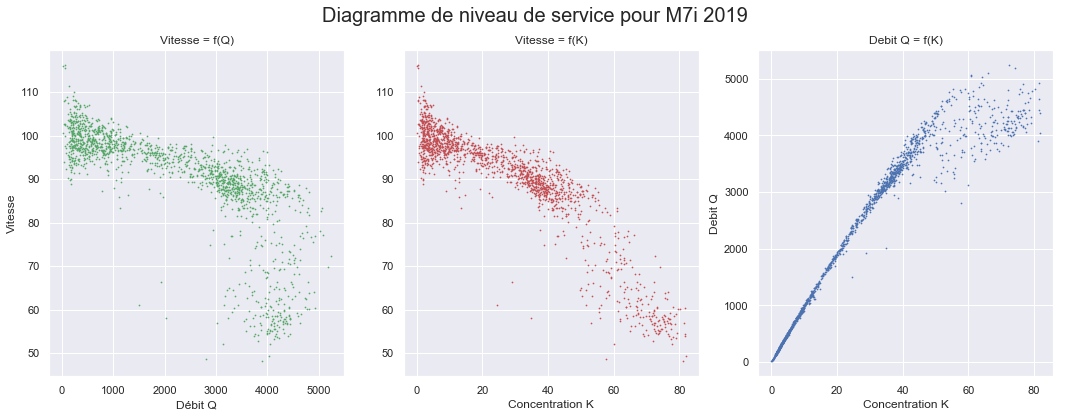

In [119]:
fig = plt.figure(figsize=(18,6))
#AXES
ax1 = fig.add_subplot(131); ax2 = fig.add_subplot(132); ax3 = fig.add_subplot(133)

#Data
ax1.scatter(result['débit'], result['vitesse'], s=.5, c='g', marker="o")
ax2.scatter(result['K'], result['vitesse'], s=.5, c='r', marker="o")
ax3.scatter(result['K'], result['débit'], s=.5, c='b', marker="o")

#Labels
ax1.set_xlabel('Débit Q'); ax1.set_ylabel('Vitesse')
ax2.set_xlabel('Concentration K'); fig.suptitle("Diagramme de niveau de service pour M7i 2019", fontsize=20)
ax3.set_xlabel('Concentration K'); ax3.set_ylabel('Debit Q')
ax3.set_title('Debit Q = f(K)'); ax2.set_title('Vitesse = f(K)'); ax1.set_title('Vitesse = f(Q)')
plt.show()

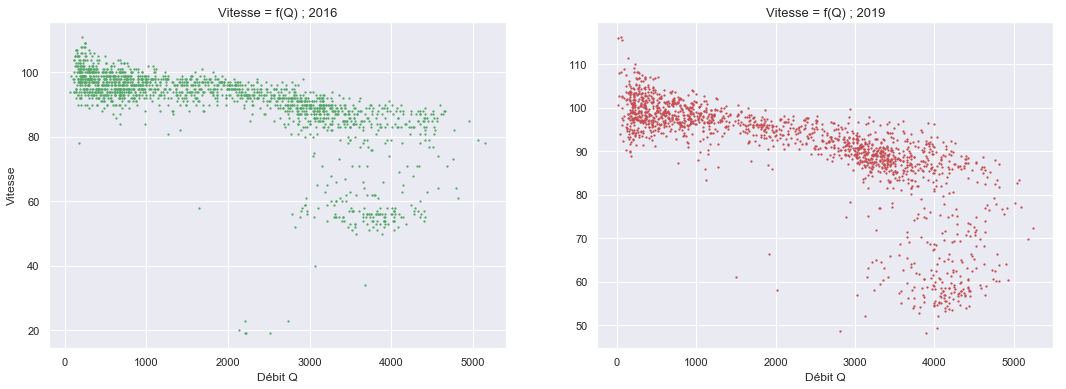

In [125]:
fig = plt.figure(figsize=(18,6))
#AXES
ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122)

#Data
ax1.scatter(df['débit'], df['vitesse'], s=1.5, c='g', marker="o")
ax2.scatter(result['débit'], result['vitesse'], s=1.5, c='r', marker="o")
#ax3.scatter(df['K'], df['débit'], s=.5, c='b', marker="o")

#Labels
ax1.set_xlabel('Débit Q'); ax1.set_ylabel('Vitesse')
ax2.set_xlabel('Débit Q')
ax2.set_title('Vitesse = f(Q) ; 2019', fontsize=13); ax1.set_title('Vitesse = f(Q) ; 2016', fontsize=13)
plt.show()

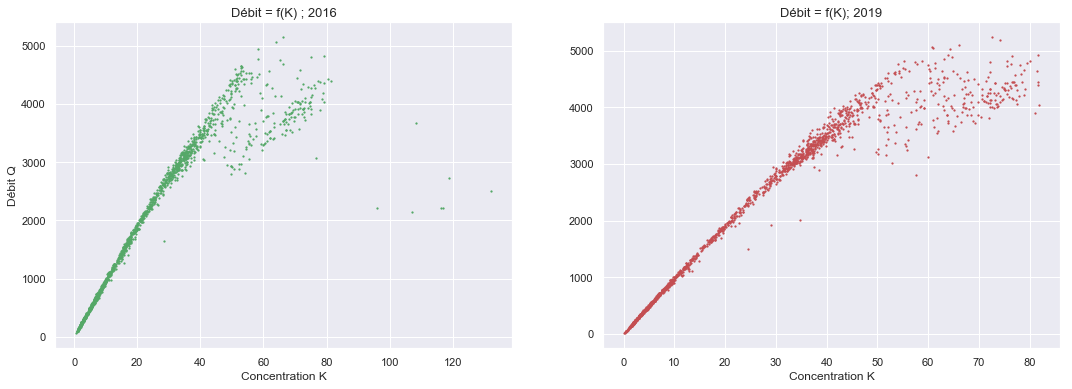

In [126]:
fig = plt.figure(figsize=(18,6))
#AXES
ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122)

#Data
ax1.scatter(df['K'], df['débit'], s=1.5, c='g', marker="o")
ax2.scatter(result['K'], result['débit'], s=1.5, c='r', marker="o")
#ax3.scatter(df['K'], df['débit'], s=.5, c='b', marker="o")

#Labels
ax1.set_xlabel('Concentration K'); ax1.set_ylabel('Débit Q')
ax2.set_xlabel('Concentration K')
ax2.set_title('Débit = f(K); 2019', fontsize=13); ax1.set_title('Débit = f(K) ; 2016', fontsize=13)
plt.show()

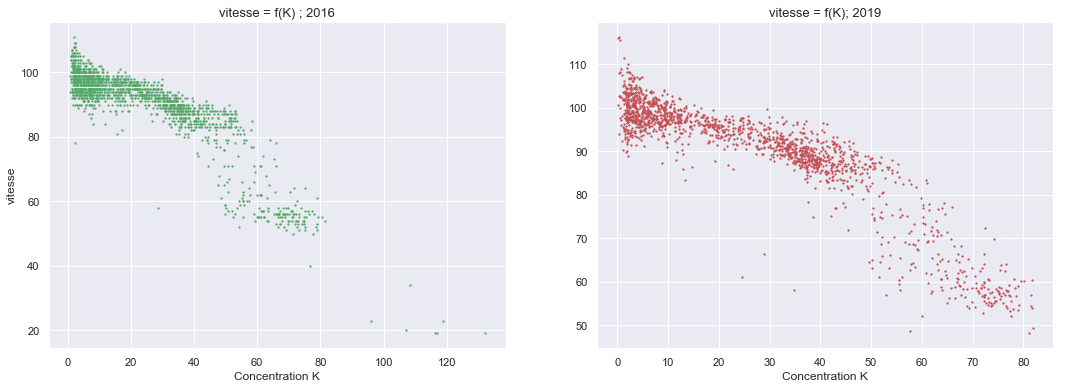

In [127]:
fig = plt.figure(figsize=(18,6))
#AXES
ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122)

#Data
ax1.scatter(df['K'], df['vitesse'], s=1.5, c='g', marker="o")
ax2.scatter(result['K'], result['vitesse'], s=1.5, c='r', marker="o")
#ax3.scatter(df['K'], df['débit'], s=.5, c='b', marker="o")

#Labels
ax1.set_xlabel('Concentration K'); ax1.set_ylabel('vitesse')
ax2.set_xlabel('Concentration K')
ax2.set_title('vitesse = f(K); 2019', fontsize=13); ax1.set_title('vitesse = f(K) ; 2016', fontsize=13)
plt.show()

In [142]:
df.describe()

,débit,vitesse,K
count,1680.000000,1680.000000,1680.000000
mean,1882.505952,90.025595,23.379536
std,1357.239769,12.400837,20.486074
min,60.000000,19.000000,0.638298
25%,610.000000,88.000000,6.368761
50%,1645.000000,93.000000,17.381553
75%,3090.000000,97.000000,35.514756
max,5150.000000,111.000000,132.105263


In [143]:
result.describe()

,veh_6mn,vitesse,débit,K
count,1680.000000,1646.000000,1680.000000,1646.000000
mean,215.310119,90.289661,2153.101190,26.917996
std,151.374653,12.182773,1513.746529,21.473762
min,0.000000,48.089080,0.000000,0.086207
25%,61.000000,87.536177,610.000000,6.793849
50%,222.000000,93.532380,2220.000000,24.692390
75%,347.250000,97.875984,3472.500000,40.510487
max,524.000000,116.250000,5240.000000,81.856058


La moyenne de la vitesse est de $90 km/h$ pour l'année $2019$ et aussi $2016$, alors que le débit et plus élevé pendant la semaine de l'année $2019$.